# DEMO: Heart Diesease Prediction using KNN - **The K-Nearest Neighbours Algorithm**

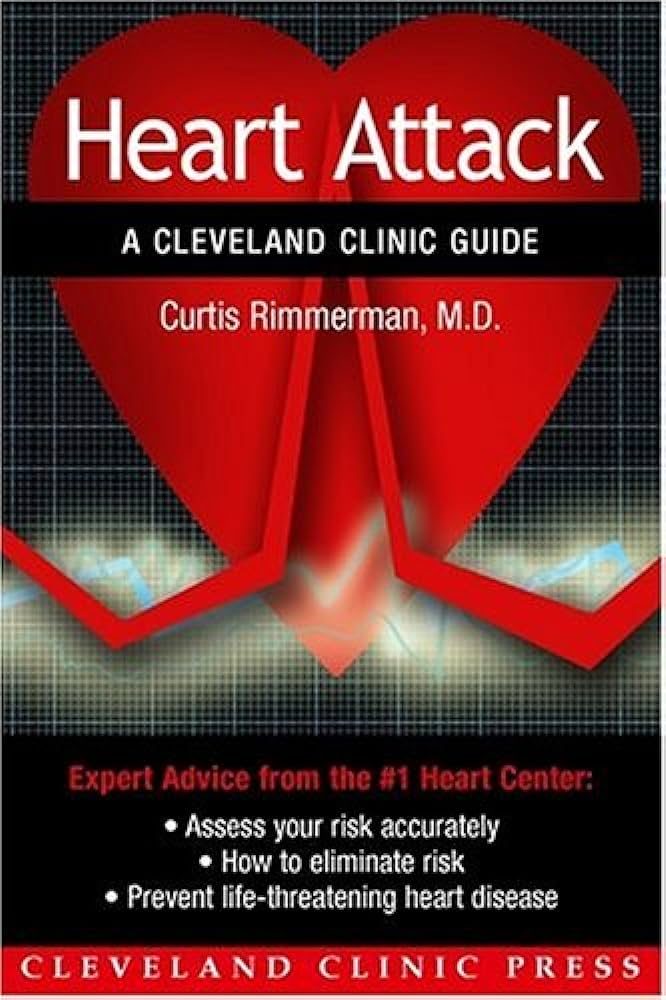

###Context
The dataset is the Cleveland Heart Disease dataset taken from the UCI repository. The dataset consists of 303 individuals’ data. There are 14 columns in the dataset(which have been extracted from a larger set of 75). No missing values. The classification task is to predict whether an individual is suffering from heart disease or not. (0: absence, 1: presence)


---  
Source/Links:
+ [Cleveland Hospital Heart Disease Dataset](https://www.kaggle.com/datasets/ritwikb3/heart-disease-cleveland)
+ [UCI ML Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
+ [scikit-learn library](https://scikit-learn.org/stable/index.html)


History:  
+ June 2021, v1, dbe --- initial version for CAS BIA
+ May 2024, v2, dbe  --- adapted version for BINA FS24

### Content
This database contains **13 attributes** and **a target variable**. It has 8 nominal values and 5 numeric values. The detailed description of all these features are as follows:

+ Age: Patients Age in years (Numeric)
+ Sex: Gender (Male : 1; Female : 0) (Nominal)
+ cp: Type of chest pain experienced by patient. This term categorized into 4 category.
0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)
+ trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)
+ chol: Serum cholesterol in mg/dl (Numeric)
+ fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
+ restecg: Result of electrocardiogram while at rest are represented in 3 distinct values
0 : Normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)
+ thalach: Maximum heart rate achieved (Numeric)
exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)
+ slope: ST segment measured in terms of slope during peak exercise
0: up sloping; 1: flat; 2: down sloping(Nominal)
ca: The number of major vessels (0–3)(nominal)
+ thal: A blood disorder called thalassemia
0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but it is not normal(nominal)


+ **condition**: It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.
Variable to be predicted: *Absence (1) or presence (2) of heart disease*

##About KNN:
+ **KNN tries to find similarities between predictors and values that are within the dataset.**
+ KNN uses a non-parametric method as there is not a particular finding of parameters to a particular functional form.
+ It does not make any type of assumptions about the features and output of the dataset.
+ KNN is also called a **lazy classifier** as it memorizes the training data and not exactly learn and fix the weights. Hence most of the computing work occurs during the classification rather than training time.
+ KNN usually works by just trying to see to which class is the new feature near to and it just puts it to the class closest to that point.

---  
# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing Models

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble  import RandomForestClassifier

---  
# Loading Dataset

In [3]:
FILEpath = "https://raw.githubusercontent.com/sawubona-repo/BINA-FS24-WORK/main/LB09-Clustering%2BClassification/Python/"
FILEname = "SampleData_Cleveland-Heart-Disease.csv"

data = pd.read_csv(FILEpath+FILEname)

# Checking for Missing data

In [4]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


# Checking Datatypes of each column

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


# Statistics for each column

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


## Find Correlation

In [9]:
corr_matrix = data.corr()

print(corr_matrix)

                age       sex        cp  trestbps      chol       fbs  \
age        1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
sex       -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
cp         0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
trestbps   0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
chol       0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
fbs        0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
restecg    0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
thalach   -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
exang      0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
oldpeak    0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
slope      0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
ca         0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
thal       0.120795  0.370556  0.266275  0.130612  

In [10]:
top_corr_features = corr_matrix.index

print(top_corr_features)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


## Plotting Correlation Heatmap

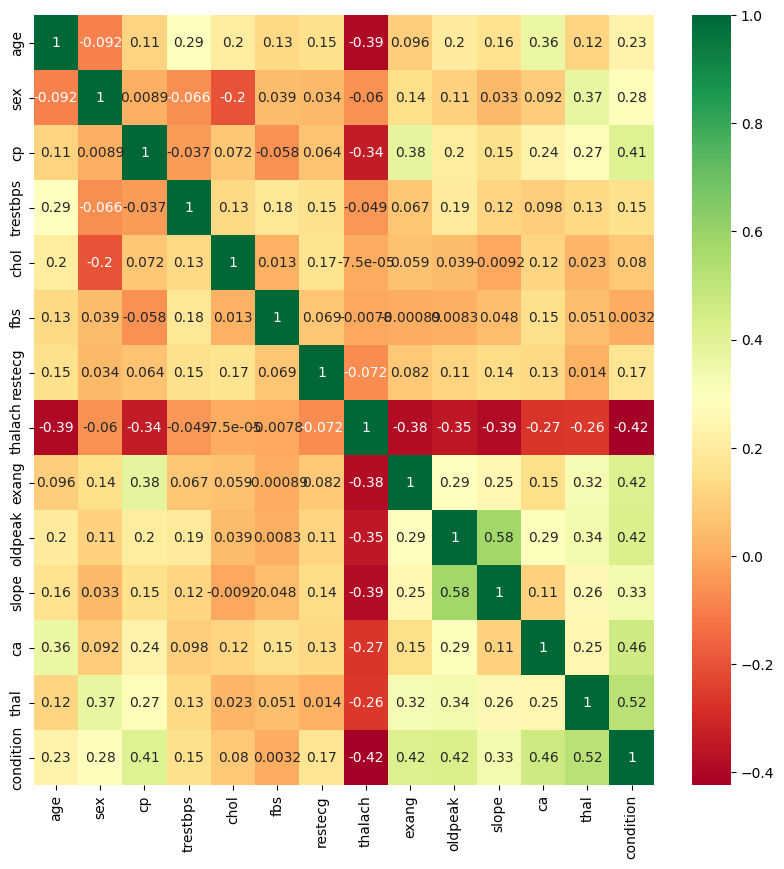

In [11]:
plt.figure(figsize=(10,10))

g=sns.heatmap(data[top_corr_features].corr(),
              annot=True,
              cmap="RdYlGn"
              )

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'condition'}>, <Axes: >, <Axes: >]],
      dtype=object)

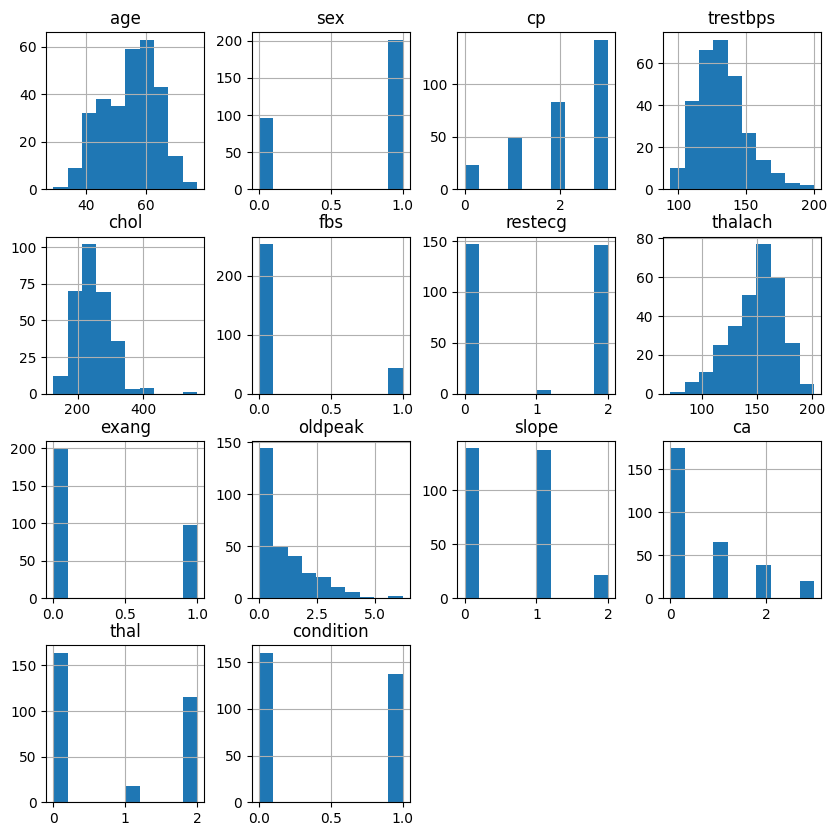

In [12]:
data.hist(figsize=(10,10))

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


# Checking Data Balance

<Axes: xlabel='condition', ylabel='count'>

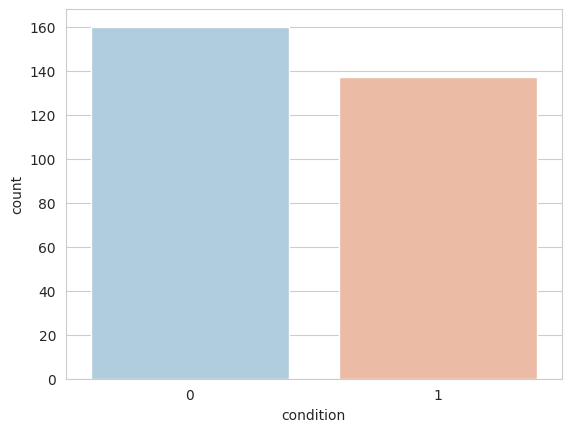

In [14]:
sns.set_style('whitegrid')

sns.countplot(x='condition',data=data,palette='RdBu_r')

# Classification Models

---  
## Feature Selection and splitting into Features (`X`) and Target (`y`)

In [15]:
feature_all = data.columns
# feature_cols = feature_all[0:8]
feature_cols = ['cp','thalach','slope']

X = data[feature_cols]
y = data['condition']

In [16]:
X

,cp,thalach,slope
0,0,131,1
1,0,151,0
2,0,114,2
3,0,174,1
4,0,144,1
...,...,...,...
292,3,181,0
293,3,140,1
294,3,130,1
295,3,182,0


## **KNearest Neighbors** Classification Model

### Finding the best value for K

In [17]:
from sklearn.model_selection import cross_val_score

k_max=21
knn_scores = []

for k in range(1,k_max):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

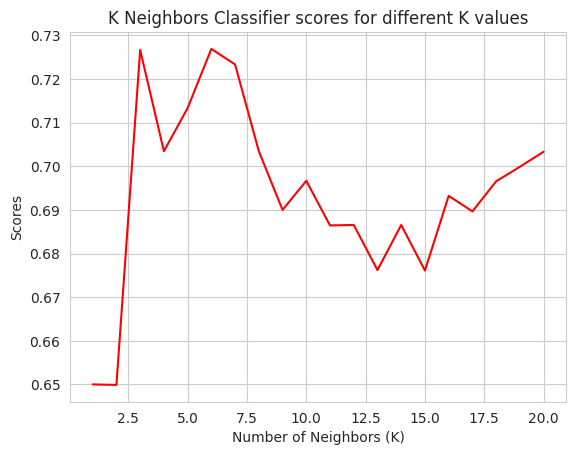

In [18]:
plt.plot([k for k in range(1, k_max)], knn_scores, color = 'red')

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

plt.show()

### Split Dataset into **Train and Test Datasets**

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [20]:
# configure classifier
knn = KNeighborsClassifier(n_neighbors = 5)

#train classifier with train data
knn.fit(X_train,y_train)

#predict target for test data
y_pred = knn.predict(X_test)

In [21]:
from sklearn import metrics

# show classifier metrics report
print("knn classifier metrics report: \n",metrics.classification_report(y_test,y_pred))

knn classifier metrics report: 
               precision    recall  f1-score   support

           0       0.80      0.62      0.70        32
           1       0.66      0.82      0.73        28

    accuracy                           0.72        60
   macro avg       0.73      0.72      0.72        60
weighted avg       0.73      0.72      0.72        60



array([[20, 12],
       [ 5, 23]])

In [32]:
# show classifier confusion matrix
print("knn classifier confusion matrix: \n", metrics.confusion_matrix(y_test,y_pred))

knn classifier confusion matrix: 
 [[20 12]
 [ 5 23]]


## Testing

In [23]:
test_patient1 = (3,150,0)
test_patient1 = np.asarray(test_patient1)
test_patient1 = test_patient1.reshape(1,-1)

test1_predict = knn.predict(test_patient1)

if test1_predict==1:
    print("Person with ",test_patient1," has HIGH chance of heart disease")
else:
    print("Person with ",test_patient1, " has LOW chance of heart disease")

Person with  [[  3 150   0]]  has HIGH chance of heart disease


In [24]:
test_patient2 = (0,115,1)
test_patient2 = np.asarray(test_patient2)
test_patient2 = test_patient2.reshape(1,-1)

test2_predict = knn.predict(test_patient2)

if test2_predict==1:
   print("Person with ",test_patient2," has HIGH chance of heart disease")
else:
  print("Person with ",test_patient2, " has LOW chance of heart disease")

Person with  [[  0 115   1]]  has LOW chance of heart disease


### Testing with on the fly (user defined) input data

In [27]:
# Prompt the user to enter a list of data values separated by commas
user_input = input("Enter heart disease values for a specific patient (separated by commas): ")

# Split the user input by commas and convert it to a list of values
data_values = [int(value) for value in user_input.split(',')]

# Print the list of data values
print("List of heart disease values entered:", data_values)

Enter heart disease values for a specific patient (separated by commas): 0,115,1
List of heart disease values entered: [0, 115, 1]


In [28]:
test_patient = data_values
test_patient = np.asarray(test_patient)
test_patient = test_patient.reshape(1,-1)

# predict the target (condition) value for the given heart disease feature values
test_predict = knn.predict(test_patient)

if test_predict==1:
    print("Person with ",test_patient," has HIGH chance of heart disease")
else:
    print("Person with ",test_patient, " has LOW chance of heart disease")

Person with  [[  0 115   1]]  has LOW chance of heart disease
